In [100]:
from torch.utils.data import Dataset
import torch
import matplotlib.pyplot as plt


In [101]:
# !curl https://www.ndbc.noaa.gov/data/realtime2/51201.spec -o waves_data.txt

In [102]:
# Define the column headers
# {'Year': '2024', 'Month': '10', 'Day': '25', 'Hour': '03', 'Minute': '16', 'WVHT': '2.0', 'SwH': '1.4', 'SwP': '10.5', 'WWH': '1.6', 'WWP': '9.9', 'SwD': 'NNE', 'WWD': 'NNE', 'Steepness': 'AVERAGE', 'APD': '8.4', 'MWD': '20'}

with open("waves_data.txt", "r") as file:
    data = file.read()
columns = [
    "Year", "Month", "Day", "Hour", "Minute", "WVHT", "SwH", "SwP", "WWH", "WWP",
    "SwD", "WWD", "Steepness", "APD", "MWD"
]

# Parse the data
parsed_data = []
for line in data.strip().split("\n"):
    if line.startswith("#"):
        continue
    print(line)
    values = line.split()
    entry = {columns[i]: values[i] for i in range(len(columns))}
    parsed_data.append(entry)
    if len(parsed_data) >= 1000:
        break

2024 12 09 03 16  0.9  0.6 10.5  0.7  9.1  NW NNW    AVERAGE  6.8 314
2024 12 09 02 46  1.1  0.6 11.1  0.9  9.1  NW NNW    AVERAGE  7.7 318
2024 12 09 02 16  1.0  0.7 11.1  0.8  9.1  NW NNW    AVERAGE  7.7 318
2024 12 09 01 46  1.1  0.7 11.1  0.9  9.9  NW  NW    AVERAGE  8.0 324
2024 12 09 01 16  1.1  0.7 11.1  0.9  9.9  NW NNW    AVERAGE  7.8 327
2024 12 09 00 46  1.1  0.7 10.5  0.9  9.9  NW NNW    AVERAGE  7.8 317
2024 12 09 00 16  1.1  0.6 10.5  0.9  9.9 NNW  NW    AVERAGE  7.4 327
2024 12 08 23 46  1.2  0.8 11.1  0.9  9.9 NNW  NW    AVERAGE  7.8 330
2024 12 08 23 16  1.1  0.8 11.1  0.8  9.9  NW NNW      SWELL  7.5 320
2024 12 08 22 46  1.2  0.9 10.5  0.9  9.9  NW  NW      SWELL  7.8 318
2024 12 08 22 16  1.2  1.0 10.5  0.8  9.9  NW  NW      SWELL  8.2 314
2024 12 08 21 46  1.2  0.9 11.1  0.9  9.9  NW NNW      SWELL  8.4 325
2024 12 08 21 16  1.3  1.1 10.5  0.9  9.9  NW  NW      SWELL  8.9 324
2024 12 08 20 46  1.3  1.0 11.1  0.8  9.9 NNW  NW      SWELL  8.9 328
2024 12 08 20 16  1.

In [103]:
for entry in parsed_data:
    print(entry)



{'Year': '2024', 'Month': '12', 'Day': '09', 'Hour': '03', 'Minute': '16', 'WVHT': '0.9', 'SwH': '0.6', 'SwP': '10.5', 'WWH': '0.7', 'WWP': '9.1', 'SwD': 'NW', 'WWD': 'NNW', 'Steepness': 'AVERAGE', 'APD': '6.8', 'MWD': '314'}
{'Year': '2024', 'Month': '12', 'Day': '09', 'Hour': '02', 'Minute': '46', 'WVHT': '1.1', 'SwH': '0.6', 'SwP': '11.1', 'WWH': '0.9', 'WWP': '9.1', 'SwD': 'NW', 'WWD': 'NNW', 'Steepness': 'AVERAGE', 'APD': '7.7', 'MWD': '318'}
{'Year': '2024', 'Month': '12', 'Day': '09', 'Hour': '02', 'Minute': '16', 'WVHT': '1.0', 'SwH': '0.7', 'SwP': '11.1', 'WWH': '0.8', 'WWP': '9.1', 'SwD': 'NW', 'WWD': 'NNW', 'Steepness': 'AVERAGE', 'APD': '7.7', 'MWD': '318'}
{'Year': '2024', 'Month': '12', 'Day': '09', 'Hour': '01', 'Minute': '46', 'WVHT': '1.1', 'SwH': '0.7', 'SwP': '11.1', 'WWH': '0.9', 'WWP': '9.9', 'SwD': 'NW', 'WWD': 'NW', 'Steepness': 'AVERAGE', 'APD': '8.0', 'MWD': '324'}
{'Year': '2024', 'Month': '12', 'Day': '09', 'Hour': '01', 'Minute': '16', 'WVHT': '1.1', 'SwH': 

In [104]:
compass_directions_to_angles = {
    "N": 0,
    "NNE": 22.5,
    "NE": 45,
    "ENE": 67.5,
    "E": 90,
    "ESE": 112.5,
    "SE": 135,
    "SSE": 157.5,
    "S": 180,
    "SSW": 202.5,
    "SW": 225,
    "WSW": 247.5,
    "W": 270,
    "WNW": 292.5,
    "NW": 315,
    "NNW": 337.5,
}

class WaveData(Dataset):
    def __init__(self, transform=None):
        self.transform = transform
        self.X = torch.tensor([[
            #float(entry["WVHT"]),
            float(entry['SwH']), float(entry['SwP']), float(compass_directions_to_angles[entry['SwD']])] for entry in parsed_data], dtype=torch.float32)

    def __len__(self):
        return len(self.X)
    def __getitem__(self, item):
        if item == len(self.X) - 1:
            return self.X[item], self.X[item]
        return self.X[item], self.X[item + 1]
dataset = WaveData()
print(dataset)


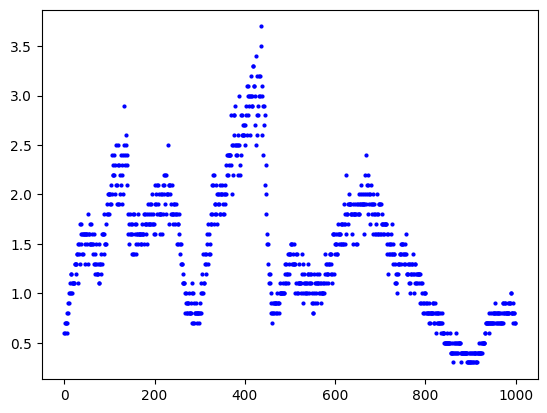

<Figure size 1000x700 with 0 Axes>

In [105]:
from torch.utils.data import DataLoader

X = []
Y = []
for i, sample in enumerate(dataset):
    X.append(i)
    Y.append(sample[0][0])

plt.scatter(X, Y, c="b", s=4, label="Training data")
plt.figure(figsize=(10, 7))
train_dataloader = DataLoader(dataset, batch_size=10, shuffle=False)

In [106]:
from torch import nn


class Model0(nn.Module):
    def __init__(self, input_shape, output_shape):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Linear(input_shape, output_shape, bias=True),
            nn.Linear(output_shape, output_shape, bias=True),
            nn.ReLU(),
        )
    def forward(self, x):
        return self.block_1(x)
torch.manual_seed(42)
model0 = Model0(3, 3)
model0

Model0(
  (block_1): Sequential(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): Linear(in_features=3, out_features=3, bias=True)
    (2): ReLU()
  )
)

In [107]:
import torchinfo
batch, labels = next(iter(train_dataloader))
data = batch[0]
print(data.shape)

model0.eval()
with torch.inference_mode():
    print(data)
    print(model0(data))

# torchinfo.summary(model0, input_size=(64, 3))


torch.Size([3])
tensor([  0.6000,  10.5000, 315.0000])
tensor([32.2735, 32.9289,  0.0000])


In [109]:
op0 = torch.optim.Adam(model0.parameters(), lr=1e-3)
loss = nn.L1Loss()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        y_pred = model(X)
        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc
train_step(model0, train_dataloader, loss, op0)

for epoch in range(1000):
    train_loss, train_acc = train_step(model0, train_dataloader, loss, op0)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Train Loss: {train_loss}, Train Acc: {train_acc}")


tensor([[  0.6000,  10.5000, 315.0000],
        [  0.6000,  11.1000, 315.0000],
        [  0.7000,  11.1000, 315.0000],
        [  0.7000,  11.1000, 315.0000],
        [  0.7000,  11.1000, 315.0000],
        [  0.7000,  10.5000, 315.0000],
        [  0.6000,  10.5000, 337.5000],
        [  0.8000,  11.1000, 337.5000],
        [  0.8000,  11.1000, 315.0000],
        [  0.9000,  10.5000, 315.0000]]) tensor([[  0.6000,  11.1000, 315.0000],
        [  0.7000,  11.1000, 315.0000],
        [  0.7000,  11.1000, 315.0000],
        [  0.7000,  11.1000, 315.0000],
        [  0.7000,  10.5000, 315.0000],
        [  0.6000,  10.5000, 337.5000],
        [  0.8000,  11.1000, 337.5000],
        [  0.8000,  11.1000, 315.0000],
        [  0.9000,  10.5000, 315.0000],
        [  1.0000,  10.5000, 315.0000]])
tensor([[  0.6000,  10.5000, 315.0000],
        [  0.6000,  11.1000, 315.0000],
        [  0.7000,  11.1000, 315.0000],
        [  0.7000,  11.1000, 315.0000],
        [  0.7000,  11.1000, 315.0000]